In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from utils import utils

from venn import venn
from venn import pseudovenn

from matplotlib import cm
from upsetplot import from_contents, from_indicators, UpSet
import seaborn as sns
import plotly.graph_objects as go

from scipy.spatial import distance
import numpy as np

import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg

from termcolor import colored

df_full = pd.read_excel('../Tables/Fkh1,2_regulation_summary.xlsx', engine='openpyxl', index_col=0)
df = df_full[['standard_name', 'desc', 'expression_peak_phase',
       'expression_peak_time', 'is_enzyme', 'KEGG_pathway', 
        'Fkh1 MacIsaac', 'Fkh1 Venters','Fkh1 Ostrow', 'Fkh1 Mondeel', 'Fkh1 Rossi', 'Fkh1 Lupo',
        'Fkh2 MacIsaac', 'Fkh2 Venters','Fkh2 Ostrow', 'Fkh2 Mondeel', 'Fkh2 Rossi', 'Fkh2 Lupo',
       'Fkh1_times_target', 'Fkh2_times_target', 'Fkh1_OE', 'Fkh2_OE', 'dFkh1', 'dFkh2', 
        'Fkh1_validated', 'Fkh2_validated']]
#df.head() 

In [2]:
# SET PLOTTING SETTINGS
def set_plot_fontsize(s = 16):
    plt.rc('font', size=s)          # controls default text sizes
    plt.rc('axes', titlesize=s)     # fontsize of the axes title
    plt.rc('axes', labelsize=s)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=s)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=s)    # fontsize of the tick labels
    plt.rc('legend', fontsize=s)    # legend fontsize
    plt.rc('figure', titlesize=s)  # fontsize of the figure title
    
    return
set_plot_fontsize()

# The z-score distribution of Lupo et al

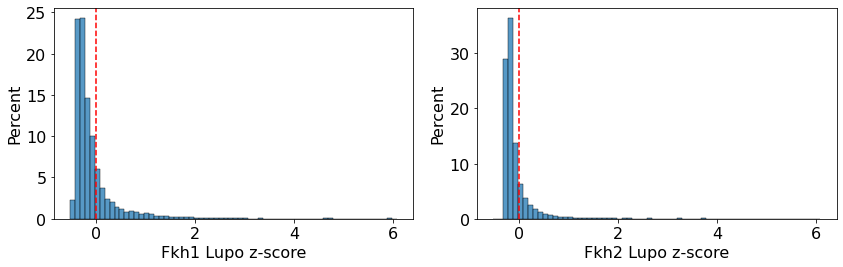

In [3]:
fig = plt.figure(figsize=(12,4))
_= plt.subplot(121)
_= sns.histplot(df_full['Fkh1 Lupo z-score'],kde=False, binrange=(-0.52,6), stat='percent', binwidth=0.1)
_= plt.axvline(x=0, color='red', linestyle='--')

_= plt.subplot(122)
_= sns.histplot(df_full['Fkh2 Lupo z-score'],kde=False, binrange=(-0.52,6), stat='percent', binwidth=0.1)
_= plt.axvline(x=0, color='red', linestyle='--')
plt.tight_layout()

# Binding study overlap as Venn diagrams with partial coverage

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

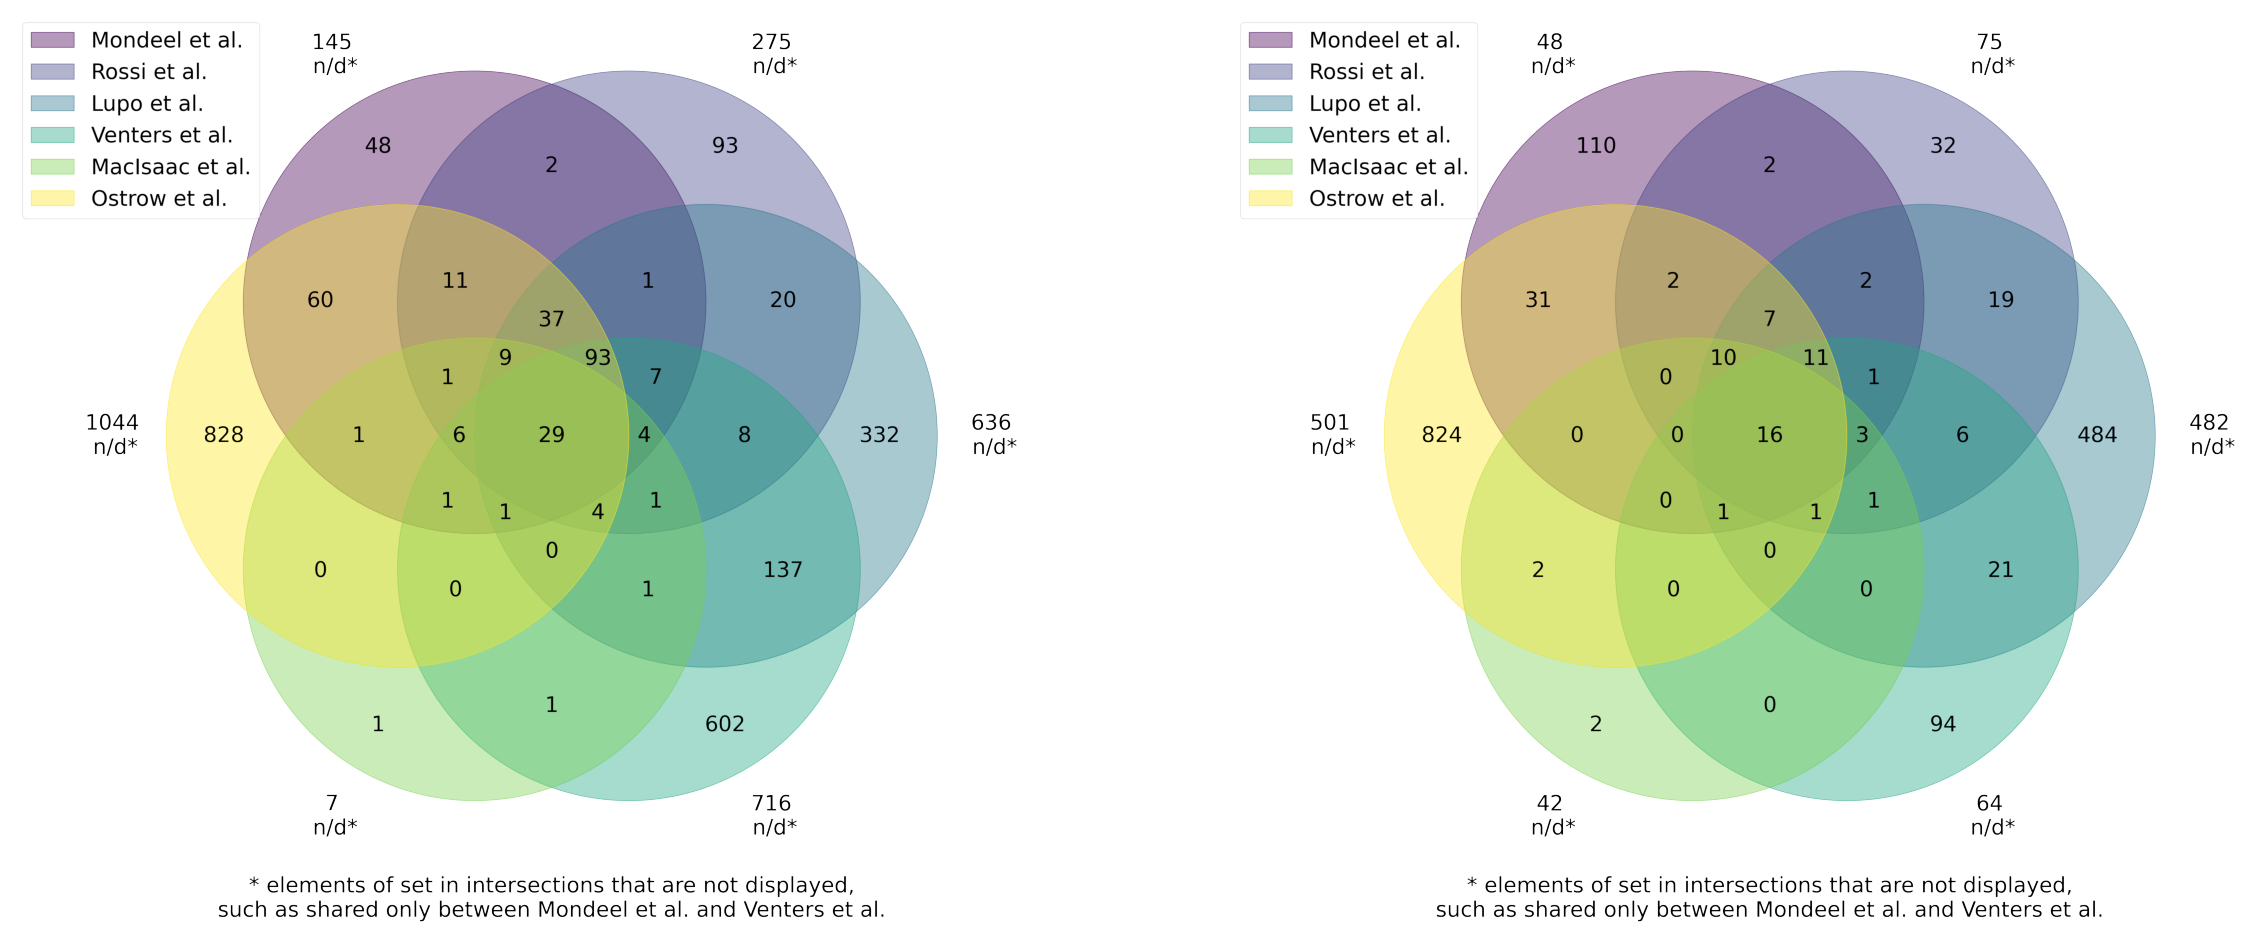

In [4]:
for fkh in ['Fkh1','Fkh2']:
    data = {'Mondeel et al.': set(df[df[fkh+' Mondeel']].index.values),
            'Rossi et al.': set(df[df[fkh+' Rossi']].index.values),
            'Lupo et al.': set(df[df[fkh+' Lupo']].index.values),
            'Venters et al.': set(df[df[fkh+' Venters']].index.values),        
            'MacIsaac et al.': set(df[df[fkh+' MacIsaac']].index.values),
            'Ostrow et al.': set(df[df[fkh+' Ostrow']].index.values), 
             }
    
    ax = pseudovenn(data, figsize=(20, 20), fontsize=32, legend_loc='upper left')
    plt.subplots_adjust(left=-5.0, bottom=0, right=-0.2)
    plt.gcf().savefig('../Figures/Overlap_'+fkh+'.png', bbox_inches='tight', dpi=200)
    plt.clf()
    
# show the output 
img1 = mpimg.imread('../Figures/Overlap_Fkh1.png',)
img2 = mpimg.imread('../Figures/Overlap_Fkh2.png')

_= plt.figure().set_size_inches(40,20)
_= plt.subplot(121)
_= plt.imshow(img1)
_= plt.axis('off')
_= plt.subplot(122)
_= plt.imshow(img2)
_= plt.axis('off')

plt.gcf().savefig('../Figures/Overlap.png', bbox_inches='tight', dpi=200)
plt.show()

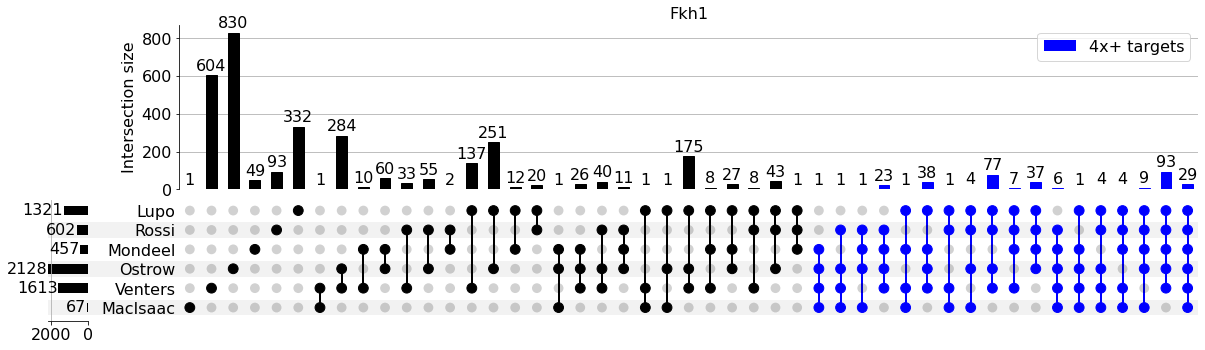

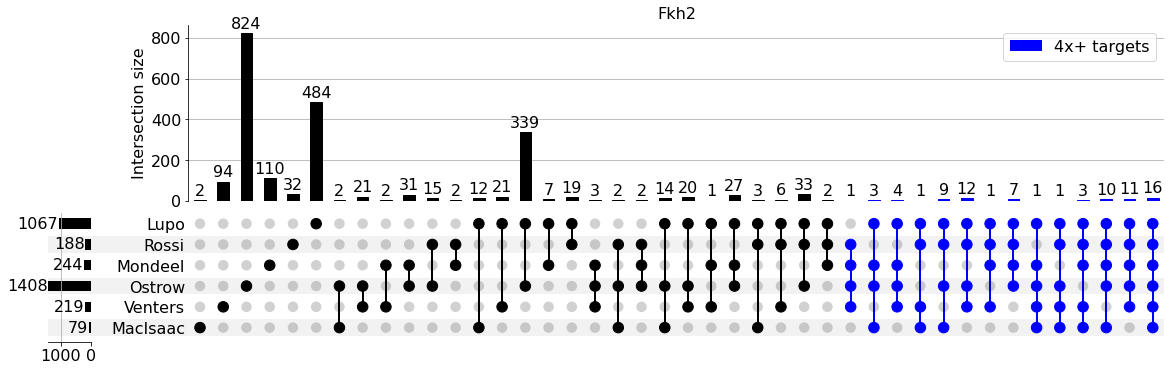

In [5]:
set_plot_fontsize(16)

cols1 = ['Fkh1 MacIsaac', 'Fkh1 Venters','Fkh1 Ostrow', 'Fkh1 Mondeel', 'Fkh1 Rossi', 'Fkh1 Lupo']
cols2 = ['Fkh2 MacIsaac', 'Fkh2 Venters','Fkh2 Ostrow', 'Fkh2 Mondeel', 'Fkh2 Rossi', 'Fkh2 Lupo']
cols = [col.replace('Fkh1 ','') for col in cols1]

df_upset1 = df[cols1].rename({col : col.replace('Fkh1 ','') for col in cols1}, axis='columns')
df_upset2 = df[cols2].rename({col : col.replace('Fkh2 ','') for col in cols2}, axis='columns')

upset = UpSet(from_indicators(cols, data=df_upset1),min_degree=1,min_subset_size=1,element_size=28, sort_by='degree',
             sort_categories_by=None,intersection_plot_elements=8, show_counts=True);
_= upset.style_subsets(min_degree=4, facecolor="blue", label="4x+ targets")
_= upset.plot()
_= plt.title("Fkh1")
_= plt.gcf().savefig('../Figures/UpSet_plot_Fkh1.png', bbox_inches='tight', dpi=200)
_= plt.show()

upset = UpSet(from_indicators(cols, data=df_upset2),min_degree=1,min_subset_size=1,element_size=30,sort_by='degree',
                     sort_categories_by=None,intersection_plot_elements=8, show_counts=True)
_= upset.style_subsets(min_degree=4, facecolor="blue", label="4x+ targets")
_= upset.plot()
_= plt.title("Fkh2")
plt.gcf().savefig('../Figures/UpSet_plot_Fkh2.png', bbox_inches='tight', dpi=200)
plt.show()

# Study correlation

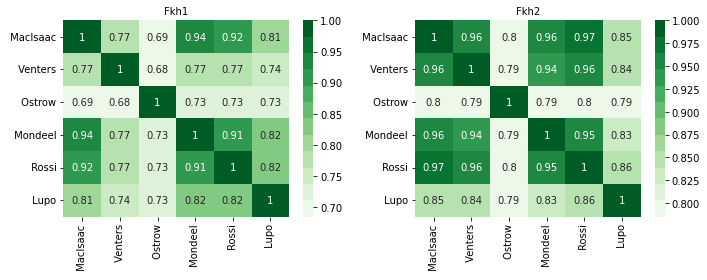

In [6]:
set_plot_fontsize(10)

cols1 = ['Fkh1 MacIsaac', 'Fkh1 Venters','Fkh1 Ostrow', 'Fkh1 Mondeel', 'Fkh1 Rossi', 'Fkh1 Lupo']
cols2 = ['Fkh2 MacIsaac', 'Fkh2 Venters','Fkh2 Ostrow', 'Fkh2 Mondeel', 'Fkh2 Rossi', 'Fkh2 Lupo']
cols_clean = [x.replace('Fkh1','') for x in cols1]
df_fkh1 = df[cols1].transpose().to_numpy()
df_fkh2 = df[cols2].transpose().to_numpy()

df_dist1 = pd.DataFrame(data=np.eye(6), columns=cols_clean,index=cols_clean)
df_dist2 = pd.DataFrame(data=np.eye(6), columns=cols_clean,index=cols_clean)
for i in range(6):
    for j in range(6):
        df_dist1.iloc[i,j] = 1 - distance.hamming(df_fkh1[i,:], df_fkh1[j,:]) #hamming / dice
        df_dist2.iloc[i,j] = 1 - distance.hamming(df_fkh2[i,:], df_fkh2[j,:]) #hamming / dice


fig = plt.figure(figsize=(10,4))
_= plt.subplot(121)
_= sns.heatmap(df_dist1,annot=True, cmap=sns.color_palette("Greens",12))
_= plt.title("Fkh1")

_= plt.subplot(122)
_= sns.heatmap(df_dist2,annot=True, cmap=sns.color_palette("Greens",12))
_= plt.title("Fkh2")
_= plt.tight_layout()

plt.gcf().savefig('../Figures/Hamming_similarity_binding_studies.png', bbox_inches='tight', dpi=200)
plt.show()

# List 4x+ binding targets

In [7]:
def format_targets(df, fkh):
    for idx,row in df.iterrows():
        g = row["standard_name"]

        if row[fkh+'_validated'] == 'Neither':
            color = None
        elif row[fkh+'_validated'] == 'Both':
            color = "blue"
        else:
            if not pd.isnull(row['d'+fkh]) and row['d'+fkh] not in ('Weakly up','Weakly down','Suspicious value'):
                color = 'red' 
            else:
                color = "green"

        if row[fkh+'_times_target'] == 5:
            attr = ['underline']
        elif row[fkh+'_times_target'] == 6:
            attr = ['bold','underline']
        else: attr = None

        # if row['is_enzyme']:
        #     on_color = "on_red"
        # else: on_color = None

        out = colored(g, color=color, on_color = None, attrs=attr)

        print(out,end=', ')

df_fkh1 = df.query("Fkh1_times_target >= 4")
df_fkh2 = df.query("Fkh2_times_target >= 4")

print(f'Fkh1 targets: {len(df_fkh1)}')
format_targets(df_fkh1,'Fkh1')
print()
print()
print(f'Fkh2 targets: {len(df_fkh2)}')
format_targets(df_fkh2,'Fkh2')

Fkh1 targets: 337
AAR2, ABF2, ABP140, ACE2, ACS1, ACS2, ADD37, ADH1, ADH4, AGE1, AHP1, AIM34, AIM46, ALD6, ALG3, ALG5, AMN1, APC1, ARG56, ARK1, ARP7, ASE1, ASK10, ATG26, ATG41, ATG42, BAP2, BBC1, BDF1, BFA1, BOI1, BRE4, BRN1, BUB1, BUD3, BUD4, BUD8, BUD9, CAM1, CAN1, CAR1, CAR2, CCW12, CCW14, CDC10, CDC19, CDC26, CDC39, CDC50, CDC7, CDS1, CHA1, CIK1, CIN8, CIT1, CIT2, CKS1, CLB1, CLB2, CLB4, CLN1, CMC4, CPA2, CPR7, CSI1, CSN9, CTF18, CTR2, CTS1, CUR1, CWP2, CYB5, DBF2, DBR1, DCC1, DIF1, DIG1, DIN7, DNA2, DSE1, DSF2, DUN1, DYN1, DYN3, ECM10, ECM22, ECM33, EDC3, EFB1, EGO2, ELP6, ENO2, ENV9, ERC1, ERG11, ERG5, ERP3, ERS1, ESL2, ESP1, ETT1, EXG1, EXO5, FAB1, FAR10, FHL1, FIN1, FIR1, FKH2, FLR1, FRK1, FRS2, FRT1, FRT2, GAS3, GAS5, GAT1, GEA1, GIC1, GID8, GLN1, GLO3, GMH1, GNA1, GND1, GTB1, GTT3, HAC1, HHF1, HOG1, HOS3, HRP1, HSF1, HSL7, HXT5, ICL1, IDI1, IFM1, IMD2, IRC15, ITT1, JSN1, KIN4, KIP2, KIP3, KSS1, KTI12, LAC1, LCB3, LOT6, LYS9, MDG1, MDM34, MDV1, MEP1, MET14, MFA2, MIT1, MKK2, M

# Validation distribution

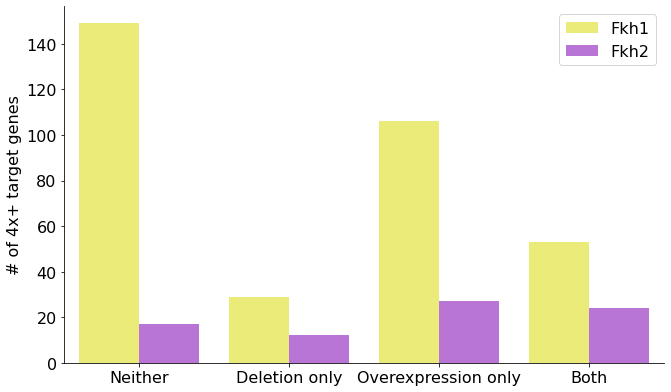

In [8]:
set_plot_fontsize(16)

df_fkh1 = df.query("Fkh1_times_target >= 4")
df_fkh2 = df.query("Fkh2_times_target >= 4")

df_fkh1 = df_fkh1.groupby('Fkh1_validated')['standard_name'].count().to_frame().rename({'standard_name':'Fkh1'},axis='columns')
df_fkh2 = df_fkh2.groupby('Fkh2_validated')['standard_name'].count().to_frame().rename({'standard_name':'Fkh2'},axis='columns')
df_val = df_fkh1.merge(df_fkh2, left_index=True, right_index=True)
df_val.index.set_names(['Validated'], inplace=True)
df_val.reset_index(inplace=True)
df_val = df_val.melt(id_vars='Validated',var_name='Fkh', value_name='n')

df_val['Validated'] = pd.Categorical(values=df_val['Validated'],
                                     categories=['Neither', 'Deletion only', 'Overexpression only', 'Both'], 
                                     ordered=True)

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=df_val, kind="bar",
    x="Validated", y="n", hue="Fkh",
    ci="sd", palette=["#FFFF00","#9400D3"], alpha=.6, height=6, aspect=1.6,
    legend=True,legend_out=False)

_= g.set_axis_labels("", "# of 4x+ target genes")
_=plt.legend(title='')
plt.gcf().savefig('../Figures/Validation_distribution_4x_targets.png', bbox_inches='tight', dpi=200)

# CCR targets distributed over phases

In [3]:
df_ccr = df[df['expression_peak_phase'].notnull() ]
perc_genome_wide = df_ccr['expression_peak_phase'].value_counts(dropna=False) / len(df_ccr) * 100
perc_genome_wide = perc_genome_wide.reindex(['G1','G1(P)','G1/S','S','G2','G2/M','M','M/G1'])

df_fkh1 = df_ccr.query("Fkh1_times_target >= 4 and Fkh1_validated != 'Neither'", engine='python')
df_fkh1 = df_fkh1['expression_peak_phase'].value_counts(dropna=False) / len(df_fkh1) * 100
df_fkh1 = df_fkh1.reindex(['G1','G1(P)','G1/S','S','G2','G2/M','M','M/G1'])

df_fkh2 = df_ccr.query("Fkh2_times_target >= 4 and Fkh2_validated != 'Neither'", engine='python')
df_fkh2 = df_fkh2['expression_peak_phase'].value_counts(dropna=False) / len(df_fkh2) * 100
df_fkh2 = df_fkh2.reindex(['G1','G1(P)','G1/S','S','G2','G2/M','M','M/G1'])

df_phases = pd.merge(perc_genome_wide,df_fkh1,left_index=True, right_index=True)
df_phases = pd.merge(df_phases,df_fkh2,left_index=True, right_index=True)
df_phases = df_phases.reset_index()
df_phases.columns = ['Phase','Genome-wide', 'Fkh1', 'Fkh2']
df_phases['Meta-phase'] = ['Early (growth)','Early (growth)','Early (growth)',
                           'Mid (genome duplication)',
                           'Late (cell division)','Late (cell division)','Late (cell division)','Late (cell division)']
df_phases = df_phases.round(2)
df_phases

,Phase,Genome-wide,Fkh1,Fkh2,Meta-phase
0,G1,10.51,9.62,1.96,Early (growth)
1,G1(P),21.94,14.42,9.80,Early (growth)
2,G1/S,17.88,6.73,1.96,Early (growth)
3,S,15.58,35.58,23.53,Mid (genome duplication)
4,G2,6.91,9.62,17.65,Late (cell division)
5,G2/M,6.18,5.77,17.65,Late (cell division)
6,M,18.43,13.46,25.49,Late (cell division)
7,M/G1,2.58,4.81,1.96,Late (cell division)


In [10]:
from bokeh.plotting import figure, show

bar_color = dict([
    ("Genome-wide", "#0d3362"),
    ("Fkh1", "#FFFF00"),
    ("Fkh2", "#9400D3"),
])

metaphase_color = dict([
    ("Early (growth)", "#e69584"),
    ("Mid (genome duplication)", "#007fff"),
    ("Late (cell division)", "#90EE90"),
])

width = 800
height = 800
inner_radius = 90
outer_radius = 300 - 10

minr = 0 
maxr = 36 
a = (outer_radius - inner_radius) / (maxr - minr)
b = inner_radius #+ a*maxr #- a * maxr

def rad(mic):
    return a * mic + b#a * np.sqrt(np.log(mic * 1E4)) + b

big_angle = 2.0 * np.pi / (len(df_phases) + 1)
small_angle = big_angle / 7

p = figure(width=width, height=height, title="",
    x_axis_type=None, y_axis_type=None,
    x_range=(-330, 330), y_range=(-345, 345), outline_line_color=None,
    min_border=0, background_fill_color="white")

_= p.xgrid.grid_line_color = None
_= p.ygrid.grid_line_color = None

# annular wedges = meta phases
angles = np.pi/2 - big_angle/2 - df_phases.index.to_series()*big_angle
colors = [metaphase_color[gram] for gram in df_phases['Meta-phase']]
_= p.annular_wedge(0, 0, inner_radius, outer_radius, -big_angle+angles, angles, color=colors,
)

# small wedges = the bars
_= p.annular_wedge(0, 0, inner_radius, rad(df_phases['Genome-wide']),
                -big_angle+angles+5*small_angle, -big_angle+angles+6*small_angle,
                color=bar_color['Genome-wide'])
_= p.annular_wedge(0, 0, inner_radius, rad(df_phases.Fkh1),
               -big_angle+angles+3*small_angle, -big_angle+angles+4*small_angle,
               color=bar_color['Fkh1'])
_ = p.annular_wedge(0, 0, inner_radius, rad(df_phases.Fkh2),
                -big_angle+angles+1*small_angle, -big_angle+angles+2*small_angle,
                color=bar_color['Fkh2'])

# circular axes and labels = percentages
labels = 6*np.arange(0,7) #np.power(10.0, np.arange(-3, 4))
radii = a * labels + b #a * np.sqrt(np.log(labels * 1E4)) + b
_= p.circle(0, 0, radius=radii, fill_color=None, line_color="#aeaeb8")
_= p.text(0, radii+12, [str(r)+'%' for r in labels],
       text_font_size="16px", text_align="center", text_baseline="middle")

# radial axes
_= p.annular_wedge(0, 0, inner_radius-10, outer_radius+10,
                -big_angle+angles, -big_angle+angles, color="black")

# phase labels
xr = (24+radii[-1])*np.cos(np.array(-big_angle/2 + angles))
yr = (24+radii[-1])*np.sin(np.array(-big_angle/2 + angles))
label_angle=np.array(-big_angle/2+angles)
label_angle[label_angle < -np.pi/2] += np.pi # easier to read labels on the left side
_= p.text(xr, yr, df_phases.Phase, angle=label_angle,
       text_font_size="16px", text_align="center", text_baseline="middle")

# Metaphase legend
_= p.circle([-300, -300, -300], [330, 310, 290], color=list(metaphase_color.values()), radius=5)
_= p.text([-290, -290, -290], [330, 310, 290], text=[gr for gr in metaphase_color.keys()],
       text_font_size="16px", text_align="left", text_baseline="middle")

# Fkh/genome-wide legend
_= p.rect([-40, -40, -40], [18, 0, -18], width=30, height=13,
       color=list(bar_color.values()))
_ = p.text([-15, -15, -15], [18, 0, -18], text=list(bar_color),
       text_font_size="16px", text_align="left", text_baseline="middle")
show(p)

# Distribution of KEGG pathways

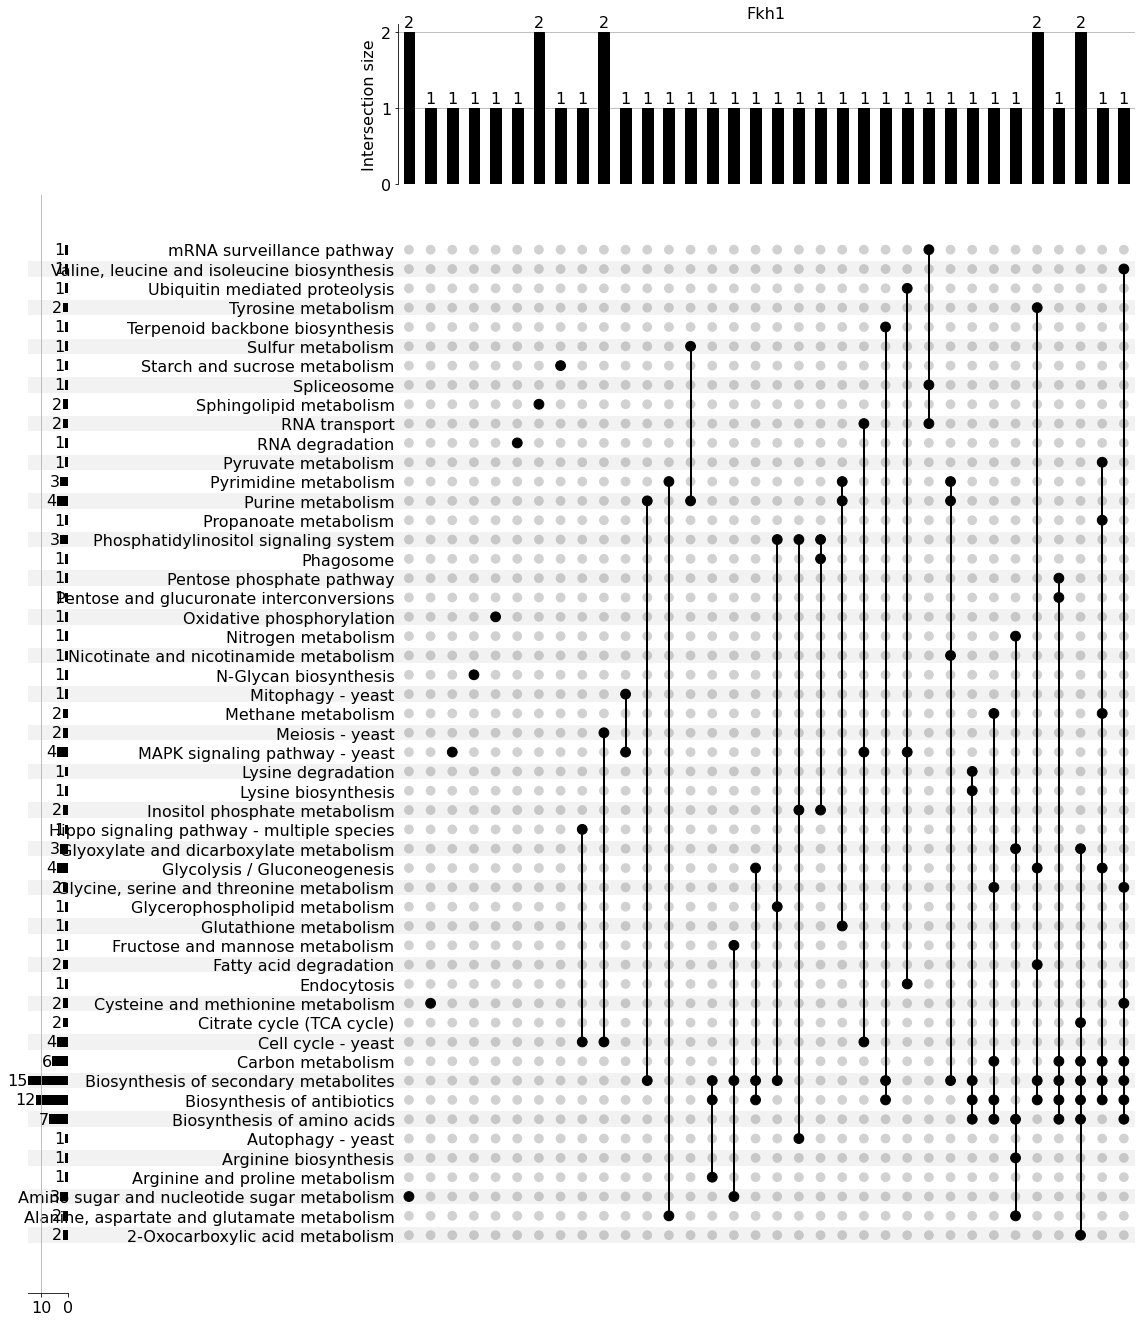

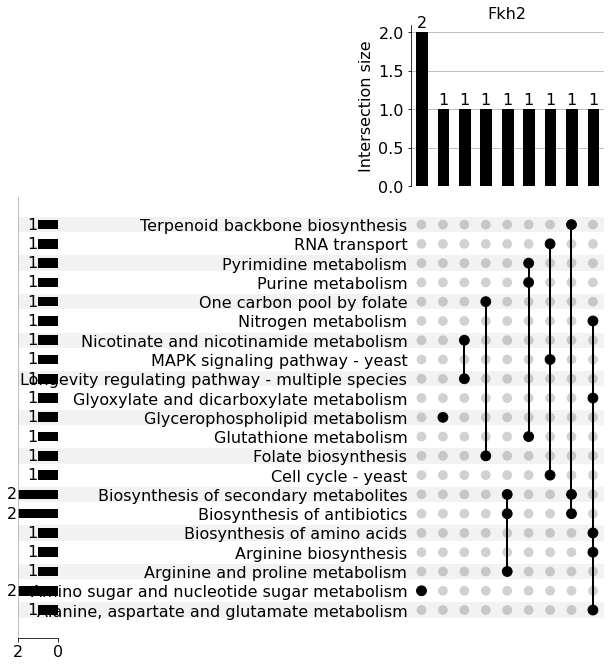

In [85]:
df_fkh1 = df.query("Fkh1_times_target >= 4 and Fkh1_validated != 'Neither'\
                    and is_enzyme == 1", engine='python')[['KEGG_pathway']]
df_fkh1.reset_index(inplace=True)
df_fkh2 = df.query("Fkh2_times_target >= 4 and Fkh2_validated != 'Neither' \
                    and is_enzyme == 1", engine='python')[['KEGG_pathway']]
df_fkh2.reset_index(inplace=True)

# explode the comma-separated pathways to extra row
from itertools import product
df_temp = df_fkh1.applymap(lambda x: x.split(', ') if isinstance (x, str) else [x])
df_fkh1 = pd.DataFrame([j for i in df_temp.values for j in product(*i)], columns=df_fkh1.columns)
df_temp = df_fkh2.applymap(lambda x: x.split(', ') if isinstance (x, str) else [x])
df_fkh2 = pd.DataFrame([j for i in df_temp.values for j in product(*i)], columns=df_fkh2.columns)

# drop pathways I don't want to see
df_fkh1 = df_fkh1.query("KEGG_pathway != 'Metabolic pathways'")
df_fkh1 = df_fkh1.query("KEGG_pathway != 'AGE-RAGE signaling pathway in diabetic complications'")
df_fkh2 = df_fkh2.query("KEGG_pathway != 'Metabolic pathways'")
df_fkh2 = df_fkh2.query("KEGG_pathway != 'AGE-RAGE signaling pathway in diabetic complications'")

# fix pathways with comma's in them
df_fkh1.loc[df_fkh1['KEGG_pathway']=='Alanine',"KEGG_pathway"] = 'Alanine, aspartate and glutamate metabolism'
df_fkh1.loc[df_fkh1['KEGG_pathway']=='aspartate and glutamate metabolism',"KEGG_pathway"] = 'Alanine, aspartate and glutamate metabolism'
df_fkh1.loc[df_fkh1['KEGG_pathway']=='Valine',"KEGG_pathway"] = 'Valine, leucine and isoleucine biosynthesis'
df_fkh1.loc[df_fkh1['KEGG_pathway']=='leucine and isoleucine biosynthesis',"KEGG_pathway"] = 'Valine, leucine and isoleucine biosynthesis'
df_fkh1.loc[df_fkh1['KEGG_pathway']=='Glycine',"KEGG_pathway"] = 'Glycine, serine and threonine metabolism'
df_fkh1.loc[df_fkh1['KEGG_pathway']=='serine and threonine metabolism',"KEGG_pathway"] = 'Glycine, serine and threonine metabolism'
df_fkh2.loc[df_fkh2['KEGG_pathway']=='Alanine',"KEGG_pathway"] = 'Alanine, aspartate and glutamate metabolism'
df_fkh2.loc[df_fkh2['KEGG_pathway']=='aspartate and glutamate metabolism',"KEGG_pathway"] = 'Alanine, aspartate and glutamate metabolism'
df_fkh2.loc[df_fkh2['KEGG_pathway']=='Valine',"KEGG_pathway"] = 'Valine, leucine and isoleucine biosynthesis'
df_fkh2.loc[df_fkh2['KEGG_pathway']=='leucine and isoleucine biosynthesis',"KEGG_pathway"] = 'Valine, leucine and isoleucine biosynthesis'
df_fkh2.loc[df_fkh2['KEGG_pathway']=='Glycine',"KEGG_pathway"] = 'Glycine, serine and threonine metabolism'
df_fkh2.loc[df_fkh2['KEGG_pathway']=='serine and threonine metabolism',"KEGG_pathway"] = 'Glycine, serine and threonine metabolism'


# pivot pathways to columns
df_fkh1 = pd.pivot_table(data=df_fkh1,columns='KEGG_pathway', index='index', aggfunc=np.count_nonzero).fillna(0).astype(bool)
df_fkh2 = pd.pivot_table(data=df_fkh2,columns='KEGG_pathway', index='index', aggfunc=np.count_nonzero).fillna(0).astype(bool)
#df_fkh1.sum().plot.bar(width=11)

cols = df_fkh1.columns
upset = UpSet(from_indicators(cols, data=df_fkh1),min_degree=1,min_subset_size=1,element_size=28, sort_by='degree',
             sort_categories_by=None,intersection_plot_elements=8, show_counts=True,orientation='horizontal');
_= upset.plot()
_= plt.title("Fkh1")
_= plt.gcf().savefig('../Figures/KEGG_pathways_Fkh1.png', bbox_inches='tight', dpi=200)
_= plt.show()

cols = df_fkh2.columns
upset = UpSet(from_indicators(cols, data=df_fkh2),min_degree=1,min_subset_size=1,element_size=28, sort_by='degree',
             sort_categories_by=None,intersection_plot_elements=8, show_counts=True,orientation='horizontal');
_= upset.plot()
_= plt.title("Fkh2")
_= plt.gcf().savefig('../Figures/KEGG_pathways_Fkh2.png', bbox_inches='tight', dpi=200)
_= plt.show()

In [11]:
df_fkh1 = df.query("Fkh1_times_target >= 4 and Fkh1_validated != 'Neither'", engine='python')
df_fkh2 = df.query("Fkh2_times_target >= 4 and Fkh2_validated != 'Neither'", engine='python')

df_targets_list = [df_fkh1, df_fkh2]
experiments = ['Fkh1','Fkh2']
pathway_counts = {} # pathway : {count: n,'genes':[gene1,gene2]}
for i,df_exp in enumerate(df_targets_list):
    exp = experiments[i]

    # filter out those genes with at least one KEGG pathway
    df_kegg = df_exp[df_exp['KEGG_pathway'].notnull()] 
    
    for i in range(len(df_kegg)): # loop over targets that are in KEGG pathways
        row = df_kegg.iloc[i]

        if row['standard_name'] != '':
            gene = row['standard_name']
        else:
            gene = row['Systematic name']

        list_of_pathways = row['KEGG_pathway'].split(', ')
        
        if len(list_of_pathways) == 0:
            print(f'here: {gene}')
        
        for pathway in list_of_pathways:
            if pathway not in pathway_counts:
                # init
                pathway_counts[pathway] = {e:[] for e in experiments}

            # add current gene to correct experiment
            pathway_counts[pathway][exp].append(gene)
                
    
df_pathway_counts = pd.DataFrame.from_dict(pathway_counts, orient="index").sort_index() 

# turn lists of genes into strings
for exp in experiments:
    df_pathway_counts[exp] = df_pathway_counts[exp].apply(lambda x: ', '.join(x) if type(x)==list else '')
    

### EXCEL EXPORT
filename = "../Tables/KEGG_pathways.xlsx"
writer = pd.ExcelWriter(filename, engine='xlsxwriter')
workbook = writer.book
df_pathway_counts.to_excel(writer, sheet_name='All')

# formatting
format_null = workbook.add_format({'text_wrap': True,'align':'left','font_size':10})
worksheet = writer.sheets['All']
worksheet.set_column('A:M',40,format_null)

writer.save()

print(len(df_pathway_counts))
df_pathway_counts

0

66


,Fkh1,Fkh2
2-Oxocarboxylic acid metabolism,"CIT1, CIT2",
ABC transporters,PDR5,
AGE-RAGE signaling pathway in diabetic complications,"KSS1, RAS1",
Alanine,"CPA2, GLN1",GLN1
Amino sugar and nucleotide sugar metabolism,"CTS1, GNA1, PSA1","CHS2, CTS1"
...,...,...
Various types of N-glycan biosynthesis,OST2,
aspartate and glutamate metabolism,"CPA2, GLN1",GLN1
leucine and isoleucine biosynthesis,CHA1,
mRNA surveillance pathway,SUB2,


# Overlapping targets

In [18]:
df_fkh1 = df.query("Fkh1_times_target >= 4 and Fkh1_validated != 'Neither'", engine='python')
df_fkh2 = df.query("Fkh2_times_target >= 4 and Fkh2_validated != 'Neither'", engine='python')
df_overlap = df_fkh1.merge(df_fkh2,how="inner", left_index=True, right_index=True)
df_overlap.shape
', '.join(df_overlap['standard_name_x'].values.tolist())

(34, 52)

'AMN1, ASE1, ATG42, BUD4, CAR2, CIN8, CLB2, CTS1, CWP2, DIF1, ENV9, FRK1, GIC1, GLN1, HOS3, HSL7, IDI1, KIP2, RNR1, RPL37B, SED1, SGO1, SIM1, SLM4, SNA2, SRL1, TEM1, VAC17, WSC2, WSC4, WTM1, YBR138C, YCG1, YHP1'

# Input for GEMMER Hierarchical edge bundles of fully validated 4x+ targets

In [100]:
df_fkh1 = df.query("Fkh1_times_target >= 4 and Fkh1_validated == 'Both'", engine='python')
df_fkh2 = df.query("Fkh2_times_target >= 4 and Fkh2_validated == 'Both'", engine='python')
df_fully_validated_4x = sorted(list(set(df_fkh1.standard_name.values.tolist() + df_fkh2.standard_name.values.tolist())))
len(df_fully_validated_4x)
print(','.join(df_fully_validated_4x))

71

AIM34,ALG5,ALK1,AMN1,ATG41,ATG42,BFA1,BUB1,CAR2,CDC10,CHA1,CHS2,CIK1,CIN8,CLB2,CLB4,CSN9,CTS1,CWP2,DBF2,DIF1,DIN7,DSE1,DYN1,DYN3,ECM33,ENV9,ERS1,ESP1,FIN1,FIR1,GAS3,GEA1,GTT3,HOS3,HSL7,HST3,KIN3,LAC1,LOT6,MIT1,MMF1,NNF1,NRM1,NVJ3,PDS1,PLM2,PMP1,PNP1,SAS3,SCW11,SCW4,SEH1,SGO1,SIM1,SLM4,SPC105,SPO12,SUN4,SUR7,SVL3,TEL2,TEM1,VAC17,VIK1,WSC2,YBR138C,YCG1,YJL118W,YKL069W,YNL058C


# Cell cycle targets

In [101]:
g = ['SWI4','SWI6','MBP1','SWI5','ACE2','CLN1','SIC1','CLB1','CLB2','CLB3','CLB4','CLB5','CLB6','FKH1','FKH2']
df.query(f'standard_name in {g}')[['standard_name','expression_peak_phase','expression_peak_time',
                                 'Fkh1_times_target','Fkh2_times_target',
                                 'Fkh1_OE', 'Fkh2_OE', 'dFkh1', 'dFkh2', 'Fkh1_validated','Fkh2_validated']]

,standard_name,expression_peak_phase,expression_peak_time,Fkh1_times_target,Fkh2_times_target,Fkh1_OE,Fkh2_OE,dFkh1,dFkh2,Fkh1_validated,Fkh2_validated
YLR131C,ACE2,G2/M,144.0,4,4,Invariant,Strongly down,Weakly up,Weakly up,Neither,Overexpression only
YGR108W,CLB1,S,89.0,4,3,Invariant,Strongly down,Significant and down,Significant and up,Deletion only,Both
YPR119W,CLB2,G2,100.0,5,5,Down,Up then down,Weakly down,Significant and down,Overexpression only,Both
YDL155W,CLB3,G1,283.0,0,1,Invariant,Invariant,Weakly up,Significant and weakly up,Neither,Deletion only
YLR210W,CLB4,S,80.0,5,0,Strongly down,Strongly down,Significant and up,Significant and up,Both,Both
YPR120C,CLB5,G1(P),38.0,0,2,Invariant,Up,Weakly down,Significant and up,Neither,Both
YGR109C,CLB6,G1/S,47.0,3,3,Invariant,Strongly down,Weakly up,Weakly up,Neither,Overexpression only
YMR199W,CLN1,G1/S,49.0,4,5,Invariant,Invariant,Weakly up,Weakly up,Neither,Neither
YIL131C,FKH1,S,67.0,3,2,Strongly up,Strongly down,Significant and suspicious value,Significant and up,Both,Both
YNL068C,FKH2,G1(P),3.0,5,2,Strongly down,Strongly up,Weakly up,Significant and suspicious value,Overexpression only,Both


# Targets in central metabolism

In [12]:
g = ['HXT5','PFK2','GND1','RPE1','TAL1','PYK1','PYC2','PDC1','ADH4','ACS1','ACS2','CIT1','CIT2','CIT3','ACO2','IDH2']
df.query(f'standard_name in {g}')[['standard_name','expression_peak_phase','expression_peak_time','is_enzyme',
                                 'Fkh1_times_target','Fkh2_times_target','KEGG_pathway',
                                 'Fkh1_OE', 'Fkh2_OE', 'dFkh1', 'dFkh2', 'Fkh1_validated','Fkh2_validated']]

,standard_name,expression_peak_phase,expression_peak_time,is_enzyme,Fkh1_times_target,Fkh2_times_target,KEGG_pathway,Fkh1_OE,Fkh2_OE,dFkh1,dFkh2,Fkh1_validated,Fkh2_validated
YJL200C,ACO2,NaN,NaN,1,2,2,"Metabolic pathways, Lysine biosynthesis, Biosy...",Invariant,Down,Weakly up,Weakly down,Neither,Overexpression only
YAL054C,ACS1,NaN,NaN,1,4,2,"Propanoate metabolism, Biosynthesis of seconda...",Invariant,Invariant,Weakly down,Significant and weakly up,Neither,Deletion only
YLR153C,ACS2,NaN,NaN,1,4,2,"Propanoate metabolism, Biosynthesis of seconda...",Down,Invariant,Weakly down,Weakly up,Overexpression only,Neither
YGL256W,ADH4,NaN,NaN,1,4,2,"Biosynthesis of secondary metabolites, Glycoly...",Invariant,Invariant,Significant and suspicious value,Significant and up,Deletion only,Deletion only
YNR001C,CIT1,G1/S,46.0,1,4,2,"Biosynthesis of secondary metabolites, Metabol...",Invariant,Invariant,Significant and down,Weakly down,Deletion only,Neither
YCR005C,CIT2,G1(P),35.0,1,4,2,"Biosynthesis of secondary metabolites, Metabol...",Down,Invariant,Weakly down,Significant and down,Overexpression only,Deletion only
YPR001W,CIT3,NaN,NaN,1,2,2,"Biosynthesis of secondary metabolites, Metabol...",Invariant,Invariant,Weakly down,Weakly down,Neither,Neither
YHR183W,GND1,NaN,NaN,1,4,1,"Pentose phosphate pathway, Biosynthesis of sec...",Invariant,Invariant,Weakly up,Up,Neither,Deletion only
YHR096C,HXT5,G1,214.0,1,5,1,Meiosis - yeast,Invariant,Strongly up,Weakly down,Weakly down,Neither,Overexpression only
YOR136W,IDH2,NaN,NaN,1,0,2,"Citrate cycle (TCA cycle), Biosynthesis of sec...",Invariant,Invariant,Significant and down,Weakly down,Deletion only,Neither
